# Введение в искусственные нейронные сети
# Урок 3. Keras

## Простая нейросеть на Keras

In [111]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [112]:
import matplotlib.pyplot as plt

def show_stats(hist, score):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    print(f"Лучшее кол-во эпох: {np.argmax(hist.history['val_acc'])+1} \
          accuracy = {np.max(hist.history['val_acc'])}")
    print(f"Test accuracy: {score[1]}")

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

<b>Немного переделал загрузку данных <b>

In [113]:
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

<b> Построим полносвязную нейронную сеть

In [114]:
# The full neural network code!
###############################


# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])
model.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_68 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


Train on 48000 samples, validate on 12000 samples
Epoch 1/9
48000/48000 [==============================] - 4s 78us/sample - loss: 0.4477 - acc: 0.8646 - val_loss: 0.2237 - val_acc: 0.9334
Epoch 2/9
48000/48000 [==============================] - 3s 61us/sample - loss: 0.1975 - acc: 0.9387 - val_loss: 0.1744 - val_acc: 0.9465
Epoch 3/9
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1469 - acc: 0.9547 - val_loss: 0.1417 - val_acc: 0.9557
Epoch 4/9
48000/48000 [==============================] - 3s 61us/sample - loss: 0.1255 - acc: 0.9600 - val_loss: 0.1186 - val_acc: 0.9642
Epoch 5/9
48000/48000 [==============================] - 3s 61us/sample - loss: 0.1023 - acc: 0.9672 - val_loss: 0.1141 - val_acc: 0.9642
Epoch 6/9
48000/48000 [==============================] - 3s 60us/sample - loss: 0.0892 - acc: 0.9719 - val_loss: 0.1172 - val_acc: 0.9665
Epoch 7/9
48000/48000 [==============================] - 3s 60us/sample - loss: 0.0808 - acc: 0.9745 - val_loss: 0.1102 - 

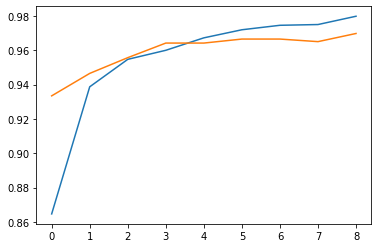

In [115]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
hist = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=9,
  batch_size=128,
  validation_split=0.2,
  validation_steps = 5
)

# Evaluate the model.
score = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:25])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:25]) # [7, 2, 1, 0, 4]

# вывод результатов обучения и теста
show_stats(hist, score)

## Попробуем сравнить со сверточной

In [116]:
from tensorflow.keras.layers import *

img_size = (28,28)
batch_size = 32

# Build the model
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape = img_size+(1,), activation = 'relu'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128))

model.add(Dense(10, activation='softmax'))
          
# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
)
model.summary()



Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)              

In [117]:
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.mnist.load_data()

In [118]:
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [119]:
# Train the model.
hist = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=7,
  batch_size=128,
  validation_split=0.2,
  validation_steps = 5
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 30s 630us/sample - loss: 0.6990 - acc: 0.8595 - val_loss: 0.1884 - val_acc: 0.9450
Epoch 2/7
48000/48000 [==============================] - 29s 605us/sample - loss: 0.1392 - acc: 0.9584 - val_loss: 0.1158 - val_acc: 0.9654
Epoch 3/7
48000/48000 [==============================] - 29s 608us/sample - loss: 0.0984 - acc: 0.9703 - val_loss: 0.1028 - val_acc: 0.9692
Epoch 4/7
48000/48000 [==============================] - 29s 605us/sample - loss: 0.0754 - acc: 0.9767 - val_loss: 0.1099 - val_acc: 0.9682
Epoch 5/7
48000/48000 [==============================] - 29s 606us/sample - loss: 0.0688 - acc: 0.9782 - val_loss: 0.0821 - val_acc: 0.9762
Epoch 6/7
48000/48000 [==============================] - 29s 606us/sample - loss: 0.0574 - acc: 0.9814 - val_loss: 0.0774 - val_acc: 0.9788
Epoch 7/7
48000/48000 [==============================] - 29s 607us/sample - loss: 0.0486 - acc: 0.9839 - val_l

10000/10000 [==============================] - 2s 238us/sample - loss: 0.0873 - acc: 0.9773
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
Лучшее кол-во эпох: 6           accuracy = 0.9788333177566528
Test accuracy: 0.9772999882698059


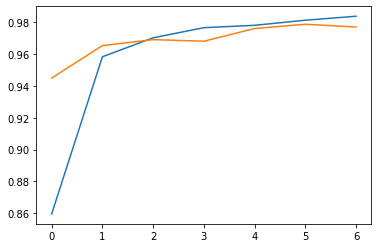

In [120]:
# Evaluate the model.
score = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:25])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:25]) # [7, 2, 1, 0, 4]

# вывод результатов обучения и теста
show_stats(hist, score)

## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть на Keras с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras.</li>
</ol>

## Выводы:
<b> Помогают в точности
<ol>
    <li>добавление валидации в обучение</li>
    <li>разумное увеличение слоев и нейронов в них</li>
    <li>увеличение эпох обучения с отслеживанием переобучения</li>
    <li>Иногда полезно уменьшить размер батча</li>
<b>Догнать сверточную сеть так и не удалось(
    
</ol>
<b>Но самое главное - правильный вибор архитектуры сети под задачу!